In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#do stuff

In [9]:
data = pd.read_csv("data/time_series_covid_19_confirmed.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


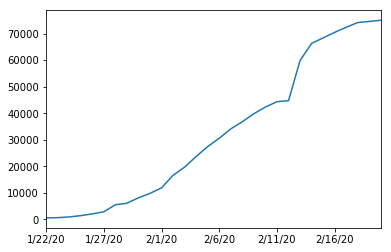

In [45]:
mainlandChina_cases = data.groupby(data['Country/Region'] == 'Mainland China').sum().iloc[1,2:]
mainlandChina_cases.plot()
plt.show()

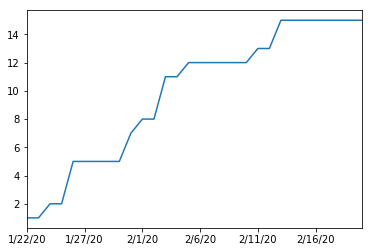

In [46]:
US_cases = data.groupby(data['Country/Region'] == 'US').sum().iloc[1,2:]
US_cases.plot()
plt.show()